<a href="https://colab.research.google.com/github/Rakshak98/coding/blob/main/PROJECT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT_1: Analyzing Socioeconomic Indicators to Predict GDP of Nations

Analyzing Socioeconomic Indicators to Predict
GDP of Nations
Dataset:-
https://www.kaggle.com/datasets/bhadramohit/world-bank-dataset1. Data Preprocessing
* Handle missing values, if any, by imputation or removal.
* Encode categorical variables (e.g., Country). o Scale numerical features like Population, Life
Expectancy, and Unemployment Rate (%) for model compatibility.
* Split the data into training and testing sets.
2. Exploratory Data Analysis (EDA)
Analyze relationships between GDP and other indicators.
Visualize key insights using scatter plots and correlation matrices to understand feature interactions and importance.
3. Model Selection
* Consider regression models such as Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor to predict GDP.
Evaluate models using Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared metrics.
* Choose the model with the best predictive performance.
4. Model Training and Hyperparameter Tuning
Train the selected model on the training data.
Perform hyperparameter tuning using cross-validation techniques.
5. Interpret Model Results
Analyze feature importance to identify the socioeconomic indicators with the most significant impact on GDP.
Present insights from the model, such as the effect of unemployment rate or access to electricity on GDP.
6. Deployment (Optional)
Consider using Streamlit or Flask for model deployment, providing an interactive interface where users can input country data to get GDP predictions.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/world_bank_dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   GDP (USD)                               200 non-null    float64
 3   Population                              200 non-null    float64
 4   Life Expectancy                         200 non-null    float64
 5   Unemployment Rate (%)                   200 non-null    float64
 6   CO2 Emissions (metric tons per capita)  200 non-null    float64
 7   Access to Electricity (%)               200 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 12.6+ KB


In [ ]:
df.head()

,Country,Year,GDP (USD),Population,Life Expectancy,Unemployment Rate (%),CO2 Emissions (metric tons per capita),Access to Electricity (%)
0,Brazil,2010,1.493220e+12,829020000.0,66.7,3.81,10.79,76.76
1,Japan,2011,1.756270e+13,897010000.0,61.4,17.98,15.67,67.86
2,India,2012,1.642688e+13,669850000.0,69.1,16.02,2.08,81.08
3,Mexico,2013,1.189001e+13,113800000.0,80.1,6.26,19.13,53.46
4,India,2014,2.673020e+12,29710000.0,62.7,3.10,15.66,82.17


In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
GDP (USD),0
Population,0
Life Expectancy,0
Unemployment Rate (%),0
CO2 Emissions (metric tons per capita),0
Access to Electricity (%),0


In [ ]:
df.describe()

,Year,GDP (USD),Population,Life Expectancy,Unemployment Rate (%),CO2 Emissions (metric tons per capita),Access to Electricity (%)
count,200.000000,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,200.000000
mean,2014.500000,1.056867e+13,7.387908e+08,66.324500,13.271650,10.058200,72.876750
std,2.879489,5.547703e+12,4.389956e+08,9.818859,6.804166,5.712125,14.791291
min,2010.000000,1.011720e+12,9.970000e+06,50.500000,2.270000,0.810000,50.120000
25%,2012.000000,5.774120e+12,3.533775e+08,57.775000,6.810000,4.882500,60.315000
50%,2014.500000,1.050615e+13,7.216700e+08,64.900000,13.470000,9.745000,70.280000
75%,2017.000000,1.503451e+13,1.090860e+09,74.500000,18.542500,15.622500,86.297500
max,2019.000000,1.998377e+13,1.498060e+09,84.900000,24.790000,19.840000,99.760000


In [ ]:
pd.get_dummies(df)

,Year,GDP (USD),Population,Life Expectancy,Unemployment Rate (%),CO2 Emissions (metric tons per capita),Access to Electricity (%),Country_Argentina,Country_Australia,Country_Brazil,...,Country_Japan,Country_Mexico,Country_Nigeria,Country_Russia,Country_Saudi Arabia,Country_South Africa,Country_South Korea,Country_Turkey,Country_United Kingdom,Country_United States
0,2010,1.493220e+12,8.290200e+08,66.7,3.81,10.79,76.76,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2011,1.756270e+13,8.970100e+08,61.4,17.98,15.67,67.86,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,2012,1.642688e+13,6.698500e+08,69.1,16.02,2.08,81.08,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2013,1.189001e+13,1.138000e+08,80.1,6.26,19.13,53.46,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,2014,2.673020e+12,2.971000e+07,62.7,3.10,15.66,82.17,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2015,1.110880e+12,6.727800e+08,78.5,22.30,11.36,66.04,False,False,False,...,False,False,False,False,False,False,False,False,False,False
196,2016,9.210290e+12,6.896500e+08,64.9,9.82,15.59,67.29,False,True,False,...,False,False,False,False,False,False,False,False,False,False
197,2017,4.937150e+12,1.234820e+09,61.0,4.14,14.66,91.16,False,False,False,...,False,False,False,False,False,False,False,False,False,True
198,2018,1.088696e+13,2.625900e+08,76.5,2.28,7.25,59.21,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(df.isnull().sum())
df.dropna(axis=1, thresh=int(0.7 * len(df)), inplace=True)


Country                                   0
Year                                      0
GDP (USD)                                 0
Population                                0
Life Expectancy                           0
Unemployment Rate (%)                     0
CO2 Emissions (metric tons per capita)    0
Access to Electricity (%)                 0
dtype: int64


In [ ]:
#encoding Country column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])

In [ ]:
#scaling relevant columns
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['Population', 'Life Expectancy', 'Unemployment Rate (%)']] = scaler.fit_transform(df[['Population', 'Life Expectancy', 'Unemployment Rate (%)']])

In [ ]:
#split the data
from sklearn.model_selection import train_test_split
#assuming GDP is the target variable
X = df.drop('GDP (USD)', axis=1)
y = df['GDP (USD)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



[]

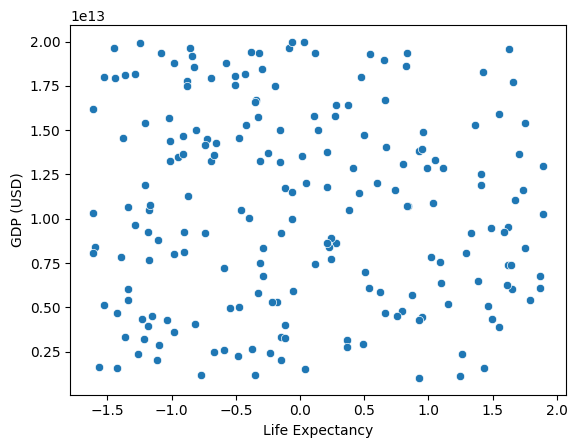

In [ ]:
#scatter plot
sns.scatterplot(data=df, x='Life Expectancy', y='GDP (USD)')
plt.plot()

[]

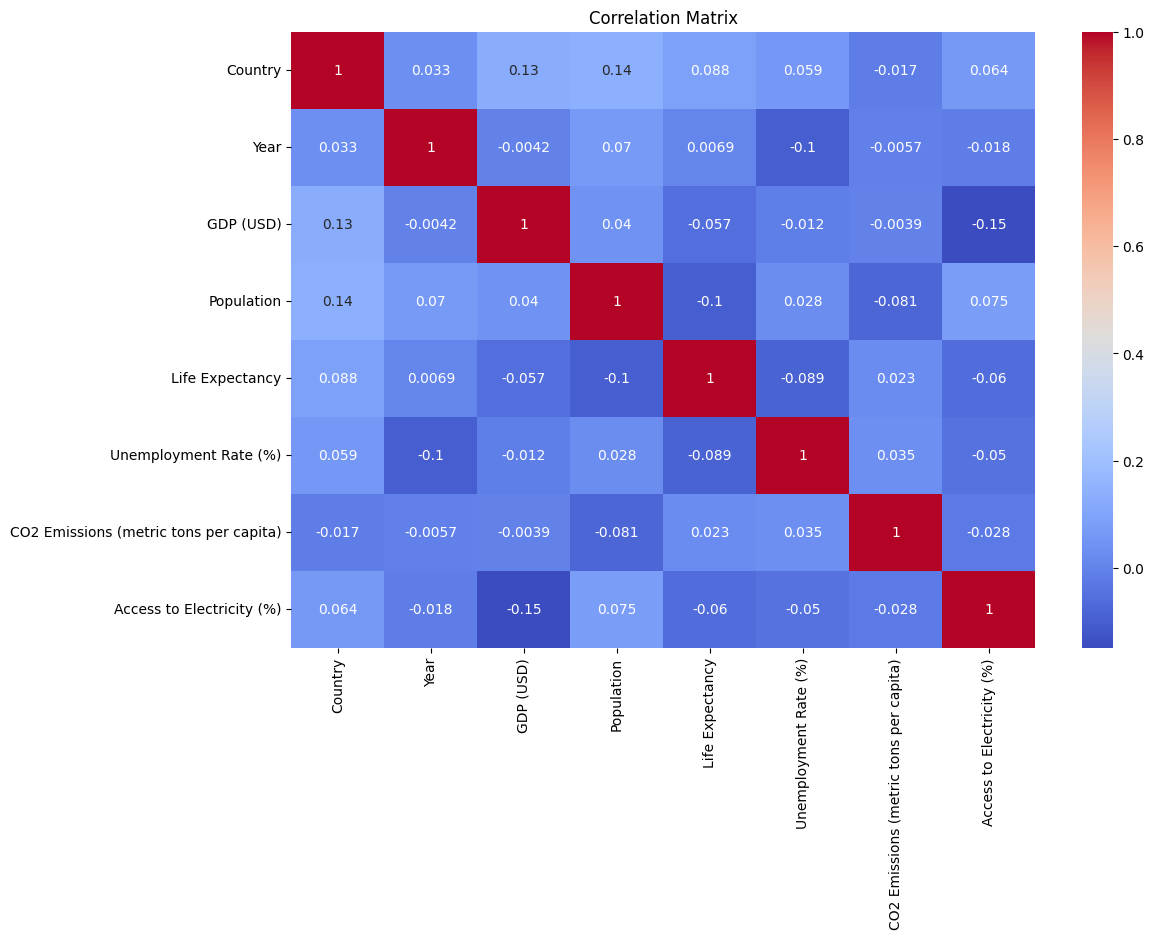

In [ ]:
#correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.plot()

3. Model Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#initialize model
models={
    "Linear Regression" : LinearRegression(),
    "Random Forest" : RandomForestRegressor(),
    "Gradiant Boosting" : GradientBoostingRegressor(),
 }


 #function to evaluate model
def evaluate_model(model, X_test, y_test):
  y_predict = model.predict(X_test)
  mae = mean_absolute_error(y_test, y_predict)
  rmse = np.sqrt(mean_squared_error(y_test, y_predict))
  r2 = r2_score(y_test, y_predict)
  return mae, rmse, r2
    # Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    mae, rmse, r2 = evaluate_model(model, X_test, y_test)
    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}
    # Convert results to a DataFrame and display
results_df = pd.DataFrame(results).T
print(results_df)



                            MAE          RMSE        R2
Linear Regression  4.932826e+12  5.779708e+12 -0.187456
Random Forest      4.632594e+12  5.704431e+12 -0.156726
Gradiant Boosting  4.511891e+12  5.919734e+12 -0.245691


4. Model Training and Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators':[100, 200, 300],
    'max_depth' : [10, 20, None],
    'min_samples_split' : [2, 5, 10]
}
#grid search for ramdom forest
grid_search= GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#best model after tuning
best_rf_model = grid_search.best_estimator_



5. Interpret Model Results

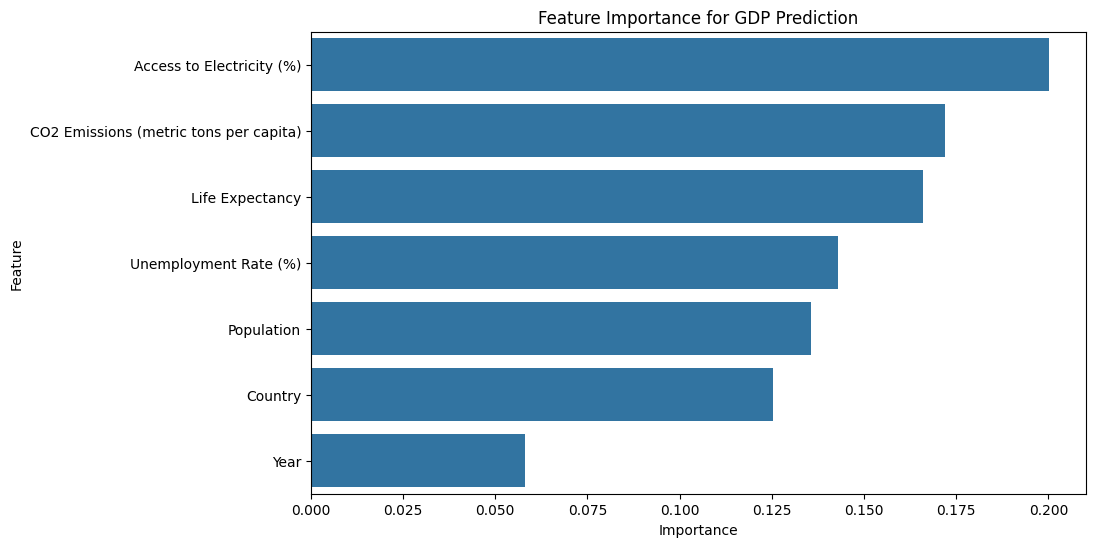

In [ ]:
importances=best_rf_model.feature_importances_
feature=X.columns
importance_df = pd.DataFrame({'Feature': feature, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for GDP Prediction')
plt.show()

6. Deployment (Optional)


In [ ]:

import pickle
with open("gdp_predictor.pkl", "wb") as f:
  pickle.dump(best_rf_model, f)

In [ ]:
# import streamlit app
!pip install streamlit
import streamlit as st
st.title("GDP Prediction App")
country = st.text_input("Country")
population = st.number_input("Population")
life_expectancy = st.number_input("Life Expectancy")
unemployment_rate = st.number_input("Unemployment Rate (%)")

if st.button("Predict GDP"):
    # Assuming the same preprocessing steps
    input_data = pd.DataFrame([[country, population, life_expectancy, unemployment_rate]], columns=X.columns)
    prediction = best_rf_model.predict(input_data)
    st.write(f"Predicted GDP: ${prediction[0]:,.2f}")

2024-11-13 15:01:03.827 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 15:01:03.830 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 15:01:03.832 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 15:01:03.835 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 15:01:03.836 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 15:01:03.837 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 15:01:03.838 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 15:01:03.839 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar